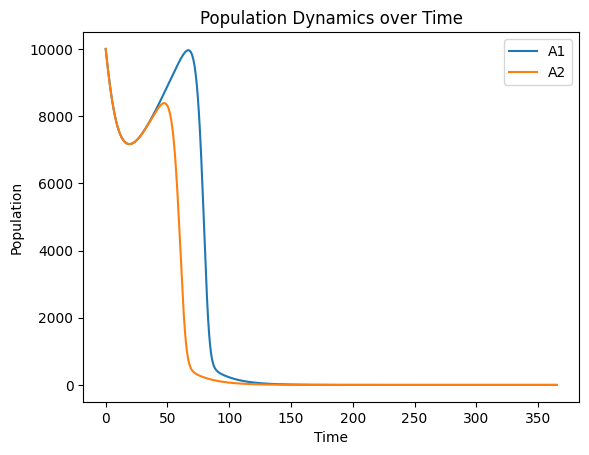

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L1 = 1500
L2 = 1500
w1 = 21000
w2 = 21000
beta1 = 1/3
beta2 = 1/17
alpha1 = 0.001
phi1 = 1/3
phi2 = 1
v = 10000
sigma = 0.001
alpha2 = 1
alpha3 = 0.0005
mu = 1/30
d1 = 0.003
d2 = 0.003
gamma1 = 0.7
gamma2 = 0.7
re1 = 0.64
re2 = 0.64

# Define initial conditions
init_conditions = [0, 0, 0, 0, 10000, 0, 0, 0, 0, 0, 10000, 1, 0, 0, 0, 0]

# Define time parameters
STARTTIME = 0
STOPTIME = 365
DT = 0.02
num_steps = int((STOPTIME - STARTTIME) / DT)

# Define RK4 method
def rk4(f, t, y, dt):
    k1 = np.array(f(t, y))
    k2 = np.array(f(t + 0.5*dt, y + 0.5*dt*k1))
    k3 = np.array(f(t + 0.5*dt, y + 0.5*dt*k2))
    k4 = np.array(f(t + dt, y + dt*k3))
    return y + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# Define the system of differential equations
def model(t, y):
    B1s, B1, B1a, C1, A1, A1s, B2s, B2, B2a, C2, A2, A2s, A21s, A21, A12s, A12 = y

    M1 = L1*((A1+A1s+A21+A21s)/(w1+A1+A1s+A21+A21s))
    P1 = (A1s+A21s)/(1+A1+A1s+A21+A21s)

    M2 = L2*((A2+A2s+A12+A12s)/(w2+A2+A2s+A12+A12s))
    P2 = (A2s+A12s)/(1+A2+A2s+A12+A12s)

    dB1s_dt = (alpha1*P1*B1)+(C1/v)*M1-(phi1*phi2*B1s)
    dB1_dt = M1-(alpha1*P1*B1)-(C1/v)*M1-beta1*B1
    dB1a_dt = (beta1*B1)-(beta2*B1a)
    dC1_dt = (phi1*phi2*B1s)*(sigma*(v-C1))
    dA1s_dt = (beta2*alpha1*P1*B1a)+(alpha2*(C1/v)*A1)+(alpha3*P1*A1)-(mu*A1s)-(d1*A1s)+(re1*gamma1*d1*A1s)
    dA1_dt = beta2*(1-alpha1*P1)*B1a-(alpha2*(C1/v)*A1)-(alpha3*P1*A1)-(mu*A1)-(d1*A1)+(re1*gamma1*d1*A1)

    dB2s_dt = (alpha1*P2*B2)+(C2/v)*M2-(phi1*phi2*B2s)
    dB2_dt = M2-(alpha1*P2*B2)-(C2/v)*M2-beta1*B2
    dB2a_dt = (beta1*B2)-(beta2*B2a)
    dC2_dt = (phi1*phi2*B2s)*(sigma*(v-C2))
    dA2s_dt = (beta2*alpha1*P2*B2a)+(alpha2*(C2/v)*A2)+(alpha3*P2*A2)-(mu*A2s)-(d2*A2s)+(re2*gamma2*d2*A2s)
    dA2_dt = beta2*(1-alpha1*P2)*B2a-(alpha2*(C2/v)*A2)-(alpha3*P2*A2)-(mu*A2)-(d2*A2)+(re2*gamma2*d2*A2)

    dA21s_dt = (d2*A2s)-(gamma2*d2*A2s)-mu*A21s+(alpha2*(C1/v)*A21)+(alpha3*P1*A21)
    dA21_dt = (d2*A2)-(gamma2*d2*A2)-mu*A21-(alpha2*(C1/v)*A21)-(alpha3*P1*A21)
    dA12s_dt = (d1*A1s)-(gamma1*d1*A1s)-mu*A12s+(alpha2*(C2/v)*A12)+(alpha3*P2*A12)
    dA12_dt = (d1*A1)-(gamma1*d1*A1)-mu*A12-(alpha2*(C2/v)*A12)-(alpha3*P2*A12)

    return [dB1s_dt, dB1_dt, dB1a_dt, dC1_dt, dA1_dt, dA1s_dt, dB2s_dt, dB2_dt, dB2a_dt, dC2_dt, dA2_dt, dA2s_dt, dA21s_dt, dA21_dt, dA12s_dt, dA12_dt]

# Initialize arrays to store results
t_values = np.zeros(num_steps+1)
y_values = np.zeros((num_steps+1, len(init_conditions)))

# Set initial conditions
t_values[0] = STARTTIME
y_values[0] = init_conditions

# Time integration using RK4
for i in range(num_steps):
    t = t_values[i]
    y = y_values[i]
    y_next = rk4(model, t, y, DT)
    t_values[i+1] = t + DT
    y_values[i+1] = y_next

# Plotting
plt.plot(t_values, y_values[:, 4], label='A1')
plt.plot(t_values, y_values[:, 10], label='A2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend()
plt.show()


In [2]:
import pandas as pd

# Create a DataFrame for the results
results_df = pd.DataFrame({'Time': t_values, 'A1': y_values[:, 4], 'A2': y_values[:, 10]})

# Display the DataFrame
print(results_df)


         Time            A1            A2
0        0.00  10000.000000  10000.000000
1        0.02   9993.004594   9993.004584
2        0.04   9986.014157   9986.014137
3        0.06   9979.028760   9979.028731
4        0.08   9972.048475   9972.048435
...       ...           ...           ...
18246  364.92      0.000039      0.000012
18247  364.94      0.000039      0.000012
18248  364.96      0.000039      0.000012
18249  364.98      0.000039      0.000012
18250  365.00      0.000039      0.000012

[18251 rows x 3 columns]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Define range of d1 and d2 values
d1_values = np.linspace(0.001, 0.01, 10)
d2_values = np.linspace(0.001, 0.01, 10)

# Initialize array to store last values of A1 and A2
last_A1_values = np.zeros((len(d1_values), len(d2_values)))
last_A2_values = np.zeros((len(d1_values), len(d2_values)))

# Loop over d1 and d2 values
for i, d1 in enumerate(d1_values):
    for j, d2 in enumerate(d2_values):
        # Define initial conditions
        init_conditions = [0, 0, 0, 0, 10000, 0, 0, 0, 0, 0, 10000, 1, 0, 0, 0, 0]

        # Define time parameters
        STARTTIME = 0
        STOPTIME = 365
        DT = 0.02
        num_steps = int((STOPTIME - STARTTIME) / DT)

        # Time integration using RK4
        t_values = np.linspace(STARTTIME, STOPTIME, num_steps+1)
        y_values = np.zeros((num_steps+1, len(init_conditions)))
        t_values[0] = STARTTIME
        y_values[0] = init_conditions
        for step in range(num_steps):
            t = t_values[step]
            y = y_values[step]
            y_next = rk4(model, t, y, DT)
            t_values[step+1] = t + DT
            y_values[step+1] = y_next

        # Store last values of A1 and A2
        last_A1_values[i, j] = y_values[-1, 4]
        last_A2_values[i, j] = y_values[-1, 10]

# Determine the maximum and minimum values for the color bar
vmin = min(np.min(last_A1_values), np.min(last_A2_values))
vmax = max(np.max(last_A1_values), np.max(last_A2_values))

# Create normalization object
norm = Normalize(vmin=vmin, vmax=vmax)

cmap = 'Accent'  # Change this to the desired colormap

# Create heatmaps with the same color bar
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(last_A1_values, extent=[min(d2_values), max(d2_values), min(d1_values), max(d1_values)], aspect='auto', cmap=cmap, norm=norm)
plt.colorbar(label='Value of A1')
plt.xlabel('d2')
plt.ylabel('d1')
plt.title('Population of A1 after 365 days')

plt.subplot(1, 2, 2)
plt.imshow(last_A2_values, extent=[min(d2_values), max(d2_values), min(d1_values), max(d1_values)], aspect='auto', cmap=cmap, norm=norm)
plt.colorbar(label='Value of A2')
plt.xlabel('d2')
plt.ylabel('d1')
plt.title('Population of A2 after 365 days')

plt.tight_layout()
plt.show()